In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
# 한글출력
import matplotlib.font_manager as fm

# font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
# font_name = fm.FontProperties(fname = font_location).get_name()
# matplotlib.rc('font',family = font_name)

mfile_model = pd.read_csv('mfile_model.csv', encoding = 'utf-8')
#mfile.head()
dt_A = pd.read_csv('dt_A.csv')
dt_B = pd.read_csv('dt_B.csv')
dt_C = pd.read_csv('dt_C.csv')
dt_D = pd.read_csv('dt_D.csv')

mfile = pd.read_csv('mfile_model.csv', encoding = 'utf-8')

# import pandas_profiling as pp

from sklearn.tree import export_graphviz

# import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

total4 = pd.read_csv('total4.csv')



In [2]:
total4

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977.0,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083.0,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083.0,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315.0,매장D,NaN,13:16,10,수
292020,2018-10-31,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892.0,매장D,NaN,11:08,10,수
292021,2018-10-31,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466.0,매장D,NaN,14:27,10,수
292022,2018-10-31,654809792,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3733.0,매장D,NaN,16:02,10,수


In [3]:
mfile

,회원번호,조합원상태,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구매금액,구,동,연령60이상,방문횟수,연령대_4560대
0,1000012800,1,0,58.0,0,0,0,50대,7658.0,수지구,풍덕천동,0,1,1
1,1000103744,1,0,34.0,0,0,0,30대,36948.0,처인구,고림동,0,1,0
2,1000122304,1,0,38.0,0,0,0,30대,142831.0,광주,기타,0,15,0
3,1000163136,1,0,73.0,0,0,0,70대이상,138892.0,수지구,동천동,1,4,0
4,1000281920,1,0,42.0,1,0,0,40대,632554.0,수지구,풍덕천동,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,0,0,47.0,0,0,0,40대,39246.0,수지구,동천동,0,1,1
11538,999721408,1,0,43.0,0,0,0,40대,43457.0,수지구,동천동,0,2,1
11539,999738112,1,0,67.0,0,0,0,60대,152960.0,수지구,성복동,1,9,1
11540,999754816,1,0,44.0,1,0,0,40대,641334.0,수지구,상현동,0,21,1


In [3]:
mfile_merge = total4.merge(mfile.drop(['조합원상태','구매금액'], axis = 1), on = '회원번호', how = 'inner')
mfile_merge

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,동,연령60이상,방문횟수,연령대_4560대
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
1,2018-01-02,220954944,정상회원,채소,잎/줄기채소,적양배추,적양배추(1통:600g이상),1.0,4212.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
2,2018-01-02,220954944,정상회원,수산,해조,김,구운김밥김(10장),1.0,3446.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
3,2018-01-02,220954944,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),2.0,14932.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
4,2018-01-02,220954944,정상회원,채소,잎/줄기채소,시금치,시금치(300g),1.0,4403.0,매장A,...,51.0,0,1,0,50대,수지구,동천동,0,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290674,2018-10-30,1644957952,정상회원,반찬,두부/유부,두부,두부(1모:420g)-쿠폰북행사,1.0,3446.0,매장D,...,42.0,0,0,0,40대,수지구,신봉동,0,1,1
290675,2018-10-30,1644957952,정상회원,간식,떡,가래떡,떡볶이떡(유기/500g),1.0,6892.0,매장D,...,42.0,0,0,0,40대,수지구,신봉동,0,1,1
290676,2018-10-30,670223872,정상회원,음료,음료,두유,검은콩두유(160ml*5봉),6.0,63750.0,매장D,...,55.0,0,0,0,50대,기타,기타,0,1,1
290677,2018-10-31,1046214208,정상회원,서류,감자,감자,감자(1kg),1.0,4977.0,매장D,...,42.0,0,0,0,40대,수지구,성복동,0,1,1


In [40]:
mfile_merge.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '반품_원거래일자', '구매시각', '월', '요일', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '연령대', '구', '동', '연령60이상', '방문횟수',
       '연령대_4560대'],
      dtype='object')

In [47]:
july = mfile_merge[mfile_merge['월'] == 7]
july.groupby(['공급일자'])['구매금액'].sum()

공급일자
2018-07-01     4901728.0
2018-07-02    14862083.0
2018-07-03    13876853.0
2018-07-04    13565165.0
2018-07-05    11759681.0
2018-07-06    12777305.0
2018-07-07    13965526.0
2018-07-08     6502272.0
2018-07-09    12107099.0
2018-07-10    11977064.0
2018-07-11     9934843.0
2018-07-12    10075477.0
2018-07-13    11410402.0
2018-07-14    10258988.0
2018-07-15     5354700.0
2018-07-16    26665115.0
2018-07-17    11962628.0
2018-07-18     9504022.0
2018-07-19    10291570.0
2018-07-20     9367156.0
2018-07-21    10708617.0
2018-07-22     5521399.0
2018-07-23    29499403.0
2018-07-24    10626377.0
2018-07-25    11758821.0
2018-07-26    10528968.0
2018-07-27    12687552.0
2018-07-28    10508152.0
2018-07-29     5166594.0
2018-07-30    10865742.0
2018-07-31     9759737.0
Name: 구매금액, dtype: float64

In [52]:
jul_16 = july[july['공급일자'] == "2018-07-16"]
jul_16.groupby(['물품명'])['구매금액'].count().sort_values(ascending = False)[:30]

물품명
유정란/매장용(10알/국내산)       59
두부(1모:420g)            50
오이(3개)                 27
콩나물(300g)              23
중파(500g)               23
당근(500g)               21
울금삼계탕(900g)            19
포도즙(팩:120ml*20봉)       19
가지(2개)                 18
생통닭(냉장/900g/국내산)       17
유정란/매장용(안심대안사료/15알)    16
삼계탕 재료모음(100g)         15
애호박(1개)                15
찰옥수수(5개)               15
브로컬리(250g)             14
찌개용두부(420g)            14
콩국물(300g)              14
상추(200g)               13
양파(1kg)                13
유기농우유(종이팩/900ml)       12
삼계용생닭(냉장/600g/국내산)     11
완숙토마토(2kg)             11
구운도시락김(5g*3봉)          11
검은콩두유(160ml*5봉)        11
굴비(10마리/800g)          11
유기농저지방우유(종이팩/900ml)    11
양파(2kg)                10
가지(4개)                 10
방울토마토/대추형(1kg)          9
찹쌀누룽지(300g)             9
Name: 구매금액, dtype: int64

In [51]:
jul_23 = july[july['공급일자'] == "2018-07-23"]
jul_23.groupby(['물품명'])['구매금액'].count().sort_values(ascending = False)[:30]

물품명
유정란/매장용(10알/국내산)       55
두부(1모:420g)            44
복숭아(2kg)               33
중파(500g)               31
콩나물(300g)              27
브로컬리(250g)             22
찌개용두부(420g)            20
방울토마토/대추형(500g)        19
유정란/매장용(안심대안사료/15알)    19
오이(3개)                 17
오리양념불고기(500g)          16
훈제오리슬라이스(250g)         16
상추(200g)               15
구운도시락김(5g*3봉)          14
허브맛닭날개양념구이(500g)       13
찰옥수수(5개)               12
애호박(1개)                12
오징어채(200g)             12
수피아 알로에베라잎즙 수딩젤        11
두부(반모:270g)            11
자두/후무사 외(2kg)          11
부추(300g)               10
양파(1kg)                10
가지(토종:2개)              10
콩국물(300g)               9
포도/유/캠벨(하우스:1.5kg)      9
냉면사리(150gx3개)           9
찰보리(국산/1kg)             9
현미유(500ml)              9
구운김밥김(10장)              9
Name: 구매금액, dtype: int64

In [68]:
jul_16_23 = july[july['공급일자'].isin(['2018-07-16','2018-07-23'])]
j_50 = jul_16_23[jul_16_23['연령대'] == "50대"]
j_50.groupby(['물품명'])['구매금액'].sum().sort_values(ascending = False)[:30]

물품명
린테우스상황버섯(200g/유)            2890766.0
굴비(10마리/800g)                679428.0
흑염소진액(100ml*30봉)             499662.0
복숭아(2kg)                     376185.0
울금삼계탕(900g)                  358380.0
참기름(330ml)                   288312.0
유정란/매장용(10알/국내산)             283327.0
홍삼액(6년근/60봉)                 229730.0
한우불고기(600g/국내산)              175170.0
오리양념불고기(500g)                174594.0
한우찜갈비(1kg/국내산)               169617.0
오징어채(200g)                   157362.0
칠분도미/유(4kg)-매장용              149325.0
한울사과즙(120ml*20봉)             148367.0
들기름(330ml)                   146454.0
훈제오리슬라이스(250g)               146454.0
백숙용토종닭(1마리/국내산)              142432.0
마고상황차(110ml*30봉)             138986.0
허브맛닭날개양념구이(500g)             136689.0
유정란/매장용(안심대안사료/15알)          134010.0
포도즙(팩:120ml*20봉)             133932.0
꽃사슴녹용액(어린이/30봉*90ml)         126351.0
어린이홍삼액(유기/60ml*30봉)          125968.0
매콤소스순살닭강정(강정400g,소스160g)     124436.0
참기름(160ml)                   123480.0
자연그대로 로션                     120609.0
겨우살이차(80

In [67]:
j_50.groupby(['물품명'])['구매금액'].count().sort_values(ascending = False)[:30]

물품명
유정란/매장용(10알/국내산)       33
두부(1모:420g)            22
오이(3개)                 16
복숭아(2kg)               15
중파(500g)               14
찌개용두부(420g)            13
울금삼계탕(900g)            12
브로컬리(250g)             11
유정란/매장용(안심대안사료/15알)    10
굴비(10마리/800g)           9
쌈채소모음(200g)             8
콩나물(300g)               8
상추(200g)                8
삼계탕 재료모음(100g)          7
훈제오리슬라이스(250g)          6
유기농우유(종이팩/900ml)        6
허브맛닭날개양념구이(500g)        6
가지(2개)                  6
방울토마토/대추형(500g)         6
딸기잼(480g)               6
오리양념불고기(500g)           6
참기름(330ml)              6
오징어채(200g)              6
구운도시락김(5g*3봉)           5
찰옥수수(5개)                5
수피아 알로에베라잎즙 수딩젤         5
참기름(160ml)              5
콩국물(300g)               5
가지(4개)                  5
생통닭(냉장/900g/국내산)        5
Name: 구매금액, dtype: int64

In [70]:
jul_not_16_23 = july[~july['공급일자'].isin(['2018-07-16','2018-07-23'])]
j_50 = jul_not_16_23[jul_not_16_23['연령대'] == "50대"]
j_50.groupby(['물품명'])['구매금액'].sum().sort_values(ascending = False)[:30]

물품명
홍삼액(6년근/60봉)           2527028.0
유정란/매장용(15알/국내산)       1343940.0
복숭아(2kg)               1153634.0
블루베리(500g)             1113427.0
유정란/매장용(안심대안사료/15알)     978273.0
두부(1모:420g)             959383.0
쌍화차(70ml*10봉)           920834.0
유정란/매장용(10알/국내산)        892476.0
수박(특:8kg이상)             735423.0
완숙토마토(2kg)              675014.0
오이(3개)                  632500.0
백숙용토종닭(1마리/국내산)         617209.0
홍삼농축액모음(100g*2병)        616441.0
홍삼액(6년근/30봉)            593468.0
찰옥수수(5개)                562444.0
울금삼계탕(900g)             537570.0
찌개용두부(420g)             531268.0
포도즙(팩:120ml*20봉)        523554.0
마고상황차(110ml*30봉)        518039.0
유기농우유(종이팩/900ml)        498529.0
홍삼농축액(100g)             470946.0
앞다리불고기-성남용인             448776.0
자두/후무사 외(2kg)           425761.0
백미/유(8kg)-매장용           411411.0
콩국물(300g)               409499.0
콩나물(300g)               403189.0
오징어채(200g)              393406.0
아카시아꿀(460g)             388626.0
등심로스-성남용인               388196.0
한우고기곰국(냉동:1.1kg)        384030.0
Name: 

In [75]:
mfile_merge['연령대'].unique()

array(['50대', '40대', '30대', '70대이상', '60대', '20대이하'], dtype=object)

In [76]:
age_50 = mfile_merge[mfile_merge['연령대'] == "50대"]
age_40 = mfile_merge[mfile_merge['연령대'] == "40대"]
age_30 = mfile_merge[mfile_merge['연령대'] == "30대"]
age_20 = mfile_merge[mfile_merge['연령대'] == "20대이하"]
age_60 = mfile_merge[mfile_merge['연령대'] == "60대"]
age_70 = mfile_merge[mfile_merge['연령대'] == "70대이상"]

age_20_item = age_20.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False).head(20)
age_30_item = age_30.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False).head(20)
age_40_item = age_40.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False).head(20)
age_50_item = age_50.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False).head(20)
age_60_item = age_60.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False).head(20)
age_70_item = age_70.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False).head(20)


In [1]:
age_20_item

NameError: name 'age_20_item' is not defined

In [80]:
age_item = pd.DataFrame(data = {'a20' : age_20_item.index, 'a30' : age_30_item.index, 'a40' : age_40_item.index,
                               'a50' : age_50_item.index, 'a60' : age_60_item.index, 'a70' : age_70_item.index}, index = range(0,20))
age_item

,a20,a30,a40,a50,a60,a70
0,우유/산양유,유정란,유정란,유정란,유정란,유정란
1,멥쌀,멥쌀,추출/농축액,추출/농축액,멥쌀,멥쌀
2,유정란,스낵,멥쌀,멥쌀,한우,한우
3,두부,한우(중량),돼지(중량),한우,두부,두부
4,한우,과즙,두부,돼지(중량),추출/농축액,사과
5,추출/농축액,추출/농축액,한우(중량),두부,사과,논지엠오유정란
6,기름,두부,한우,한우(중량),기름,기름
7,보리살림돼지,기름,스낵,사과,냉동생선,한우(냉장)
8,한우(중량),냉동생선,우유/산양유,냉동생선,스낵,추출/농축액
9,한우(냉장),우유/산양유,기름,기름,우유/산양유,냉동생선


In [81]:
age_20_item = age_20.groupby(['물품소분류'])['구매금액'].count().sort_values(ascending = False).head(20)
age_30_item = age_30.groupby(['물품소분류'])['구매금액'].count().sort_values(ascending = False).head(20)
age_40_item = age_40.groupby(['물품소분류'])['구매금액'].count().sort_values(ascending = False).head(20)
age_50_item = age_50.groupby(['물품소분류'])['구매금액'].count().sort_values(ascending = False).head(20)
age_60_item = age_60.groupby(['물품소분류'])['구매금액'].count().sort_values(ascending = False).head(20)
age_70_item = age_70.groupby(['물품소분류'])['구매금액'].count().sort_values(ascending = False).head(20)

age_item = pd.DataFrame(data = {'a20' : age_20_item.index, 'a30' : age_30_item.index, 'a40' : age_40_item.index,
                               'a50' : age_50_item.index, 'a60' : age_60_item.index, 'a70' : age_70_item.index}, index = range(0,20))
age_item

,a20,a30,a40,a50,a60,a70
0,두부,스낵,두부,두부,두부,두부
1,우유/산양유,두부,유정란,유정란,유정란,유정란
2,스낵,유정란,스낵,스낵,스낵,콩나물
3,유정란,과즙,우유/산양유,콩나물,콩나물,스낵
4,양파,우유/산양유,콩나물,우유/산양유,우유/산양유,우유/산양유
5,오이,김가공,김가공,양파,오이,논지엠오유정란
6,"식빵, 식사대용",콩나물,과즙,오이,멥쌀,오이
7,멥쌀,양파,양파,김가공,양파,양파
8,애호박,푸딩,"식빵, 식사대용",돼지(중량),김가공,멥쌀
9,앙금크림빵,"식빵, 식사대용",가래떡,멥쌀,논지엠오유정란,당근


In [39]:
age_month_sell = mfile_merge.groupby(['연령대','월'])['구매금액'].sum().unstack()
age_month_sell

월,1,2,3,4,5,6,7,8,9,10
연령대,,,,,,,,,,
20대이하,698383.0,737582.0,1609991.0,1614699.0,1072812.0,1205443.0,1111654.0,980975.0,1025431.0,883455.0
30대,42596193.0,37610803.0,42871130.0,39538984.0,42743376.0,40062083.0,46662648.0,41994378.0,36171608.0,40754484.0
40대,130635328.0,118532175.0,124866266.0,113167579.0,119587618.0,121494807.0,132184638.0,123235116.0,118216942.0,114204891.0
50대,84934203.0,93967526.0,86176729.0,80009120.0,82434216.0,85850278.0,100238268.0,90318452.0,98172451.0,80781369.0
60대,44429471.0,53865145.0,46272638.0,43157372.0,45318329.0,41391676.0,48811870.0,48015814.0,52015710.0,45452449.0
70대이상,27879002.0,34892734.0,26362728.0,26143894.0,29687980.0,27812471.0,29741961.0,30909659.0,34545145.0,28105852.0


C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: Ru

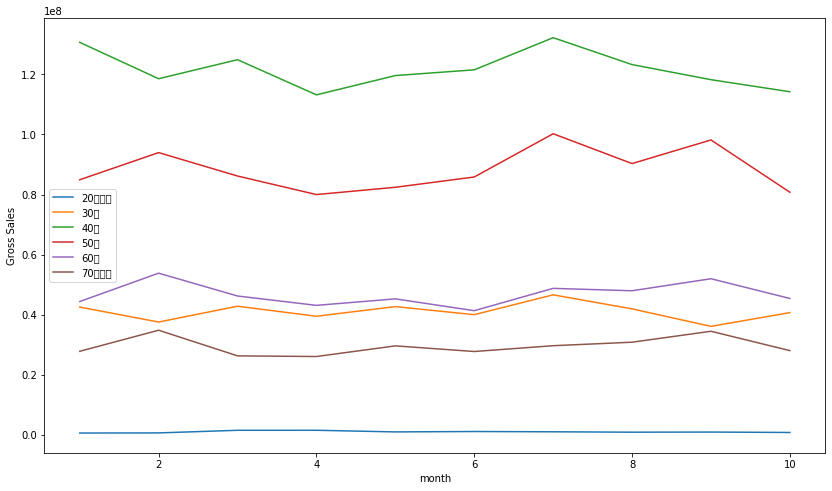

In [45]:
plt.figure(figsize = (14,8))
#day_month_sell.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
age_month_sell_T = age_month_sell.T
for i in age_month_sell_T.columns:
    plt.plot(age_month_sell_T.index, age_month_sell_T[i], label = i)
plt.legend()
plt.xlabel("month")
plt.ylabel("Gross Sales")
plt.show()

In [36]:
age_day_sell = mfile_merge.groupby(['요일','연령대'])['구매금액'].sum().unstack()
age_day_sell = age_day_sell.reindex(['월','화','수','목','금','토','일'])
age_day_sell

연령대,20대이하,30대,40대,50대,60대,70대이상
요일,,,,,,
월,2089225.0,81060280.0,222336006.0,147956602.0,85067936.0,51489425.0
화,1387664.0,62336818.0,188710650.0,131150380.0,69423568.0,42789642.0
수,1215227.0,61517139.0,178351239.0,125095656.0,70437872.0,45092099.0
목,1732134.0,57745006.0,178191908.0,127693164.0,70827332.0,47244247.0
금,1490625.0,59499529.0,184132993.0,134155074.0,71888311.0,49305362.0
토,1769452.0,54564931.0,172479678.0,142930759.0,67062312.0,40176388.0
일,1256098.0,34281984.0,91922886.0,73900977.0,34023143.0,19984263.0


C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: Ru

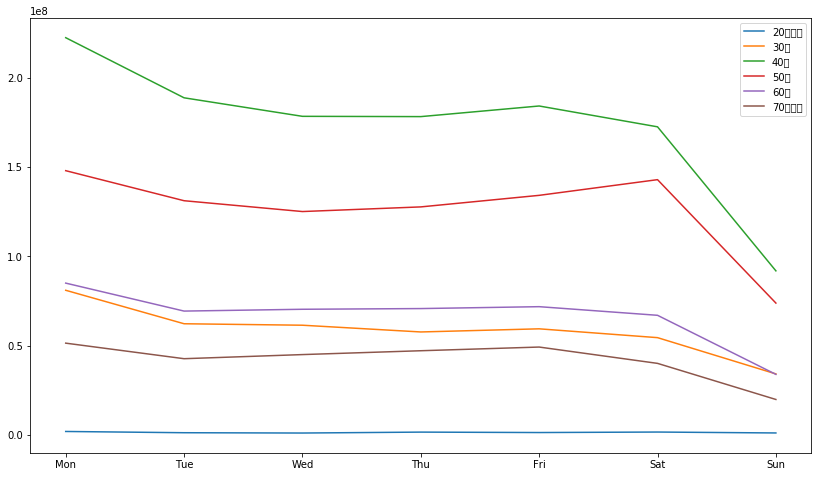

In [82]:
plt.figure(figsize = (14,8))
#day_month_sell.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
#age_month_sell_T = age_month_sell.T
age_day_sell.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
for i in age_day_sell.columns:
    plt.plot(age_day_sell.index, age_day_sell[i], label = i)
plt.legend()
plt.show()

In [42]:
age_day_visit = mfile_merge.groupby(['요일','연령대'])['방문횟수'].count().unstack()
age_day_visit = age_day_visit.reindex(['월','화','수','목','금','토','일'])
age_day_visit

연령대,20대이하,30대,40대,50대,60대,70대이상
요일,,,,,,
월,189,8003,20421,12141,7242,4227
화,145,6199,17254,10865,6095,3760
수,145,6162,16091,10538,5830,3494
목,164,5948,16407,10495,5977,4092
금,171,5981,16786,11282,6068,3909
토,173,5335,15333,11752,5674,3553
일,124,3520,8612,5939,2921,1662


C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\JeongJongWoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: Ru

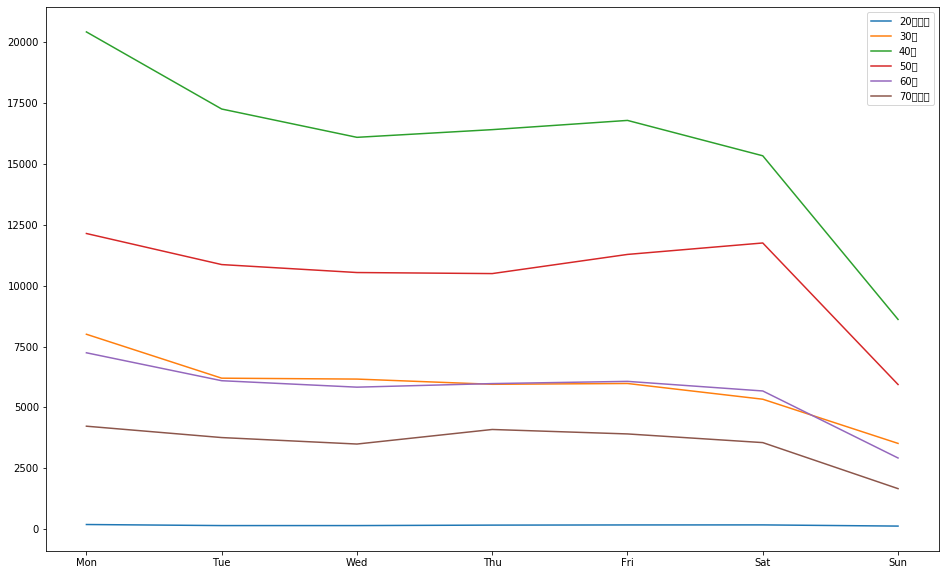

In [43]:
plt.figure(figsize = (16,10))
#day_month_sell.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
#age_month_sell_T = age_month_sell.T
age_day_visit.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
for i in age_day_visit.columns:
    plt.plot(age_day_visit.index, age_day_visit[i], label = i)
plt.legend()
plt.show()

In [90]:
unit_price = mfile_merge.groupby(['물품소분류'])['구매금액'].sum().sort_values(ascending = False)[:50]
unit_count = mfile_merge.groupby(['물품소분류'])['구매수량'].sum().sort_values(ascending = False)

df_unit_price = pd.DataFrame(unit_price)
df_unit_price.reset_index(inplace = True)
df_unit_count = pd.DataFrame(unit_count)
df_unit_count.reset_index(inplace = True)

price_count = df_unit_price.merge(df_unit_count, on = '물품소분류', how = 'left')
price_count['단가'] = price_count['구매금액'] / price_count['구매수량']
price_count.sort_values('단가', ascending = False)

,물품소분류,구매금액,구매수량,단가
17,홍삼,40048063.0,250.96,159579.466847
39,녹용,19324073.0,125.40,154099.465710
27,유기한우,28817613.0,682.50,42223.608791
2,추출/농축액,96368111.0,2384.30,40417.779222
3,한우,82052610.0,2061.00,39812.037846
43,꿀,17879658.0,462.00,38700.558442
5,한우(중량),69609195.0,2185.00,31857.755149
15,한우(냉장),46125140.0,1604.00,28756.321696
1,멥쌀,101483354.0,3591.00,28260.471735
22,기초화장품,34477660.0,1270.00,27147.763780


In [92]:
unit_price = mfile_merge.groupby(['물품명'])['구매금액'].sum().sort_values(ascending = False)[:1000]
unit_count = mfile_merge.groupby(['물품명'])['구매수량'].sum().sort_values(ascending = False)

df_unit_price = pd.DataFrame(unit_price)
df_unit_price.reset_index(inplace = True)
df_unit_count = pd.DataFrame(unit_count)
df_unit_count.reset_index(inplace = True)

price_count = df_unit_price.merge(df_unit_count, on = '물품명', how = 'left')
price_count['단가'] = price_count['구매금액'] / price_count['구매수량']
price_count.sort_values('단가', ascending = False).head(50)

,물품명,구매금액,구매수량,단가
430,한결홍옥고(1kg),2010135.0,5.00,402027.000000
744,유기한우찜갈비(3kg),1125677.0,3.50,321622.000000
190,홍삼농축액모음(100g*2병),3852760.0,12.50,308220.800000
276,린테우스상황버섯(200g/유),2890766.0,10.00,289076.600000
254,한우찜갈비(3kg),3053490.0,11.00,277590.000000
488,꽃사슴녹용액(여성/60봉*90ml),1742118.0,7.00,248874.000000
298,꽃사슴녹용액(남성/60봉*90ml),2737614.0,11.00,248874.000000
989,꽃사슴녹용액(어린이/60봉*90ml),771509.0,3.10,248873.870968
467,꽃사슴녹용액(수험생/60봉*90ml),1816778.0,7.30,248873.698630
17,홍삼액(6년근/60봉),14645273.0,63.75,229729.772549


In [11]:
A_distance = pd.read_csv('A매장_거리.csv')
A_distance.sort_values('거리', ascending = True).head(20)

,위치,거리,구
52,수지구-동천동,3,수지구
51,수지구-기타,7,수지구
55,수지구-신봉동,7,수지구
57,수지구-풍덕천동,7,수지구
27,분당구-금곡동,8,분당구
21,기흥구-죽전동,10,기흥구
14,기흥구-보정동,10,기흥구
56,수지구-죽전동,10,수지구
36,분당구-정자동,11,분당구
26,분당구-궁내동,12,분당구


In [ ]:
#sorted_total_2 = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
cnt_data = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
single_purchase = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
#double_purchase = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
temp = 0
single_purchase['구매물품수'] = 0

for i in cnt_data.index:
    temp += 1
    if i == len(cnt_data)-1:
        if temp > 1:
            single_purchase.drop(single_purchase.index[i-temp+1:i+1], inplace = True)
        break
    if cnt_data['공급일자'][i] != cnt_data['공급일자'][i+1]:
        if temp > 1:
            single_purchase.drop(single_purchase.index[i-temp+1:i+1], inplace = True)
        temp = 0
    if i % 1000 == 0:
        print(i, len(single_purchase), len(double_purchase))

In [4]:
#sorted_total_2 = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
cnt_data = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
single_purchase = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
#double_purchase = total4.sort_values(['회원번호','공급일자']).reset_index(drop = True)
temp = 0
single_purchase['구매물품수'] = 0

for i in cnt_data.index:
    temp += 1
    if i == len(cnt_data)-1:
        for j in range(i-temp+1,i+1):
            single_purchase['구매물품수'][j] = temp
        break
    if cnt_data['공급일자'][i] != cnt_data['공급일자'][i+1]:
        for j in range(i-temp+1,i+1):
            single_purchase['구매물품수'][j] = temp
        temp = 0
    if i % 1000 == 0:
        print(i, len(single_purchase[single_purchase['구매물품수'] == 1]))

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0 1
1000 239
2000 436
3000 658
4000 910
5000 1081
6000 1196
7000 1494
8000 1618
9000 1799
10000 1999
11000 2215
12000 2392
13000 2595
14000 2745
15000 2996
16000 3157
17000 3445
18000 3729
19000 3965
20000 4248
21000 4407
22000 4699
23000 4902
24000 5143
25000 5385
26000 5590
27000 5824
28000 6085
29000 6231
30000 6463
31000 6720
32000 6978
33000 7231
34000 7497
35000 7702
36000 7890
37000 8164
38000 8331
39000 8599
40000 8825
41000 9027
42000 9230
43000 9489
44000 9730
45000 9952
46000 10225
47000 10508
48000 10769
49000 11044
50000 11288
51000 11599
52000 11816
53000 12120
54000 12415
55000 12751
56000 13012
57000 13238
58000 13456
59000 13687
60000 13905
61000 14168
62000 14415
63000 14613
64000 14824
65000 15043
66000 15270
67000 15441
68000 15671
69000 15868
70000 16103
71000 16315
72000 16468
73000 16652
74000 16875
75000 17019
76000 17266
77000 17423
78000 17671
79000 17873
80000 18132
81000 18326
82000 18566
83000 18794
84000 19047
85000 19230
86000 19446
87000 19656
88000 1981

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [6]:
single_purchase.head(30)

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일,구매물품수
0,2018-07-04,18613824,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장C,NaN,16:02,7,수,1
1,2018-01-23,18764160,정상회원,생활용품,생활용품,치약/칫솔,물사랑치약(150g*2개),1.0,8806.0,매장A,NaN,15:41,1,화,1
2,2018-03-30,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장A,NaN,16:55,3,금,1
3,2018-04-28,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059.0,매장D,NaN,18:58,4,토,1
4,2018-05-03,18764160,정상회원,간식,과자,스낵,오징어땅콩볼(100g),1.0,4595.0,매장D,NaN,12:40,5,목,1
5,2018-06-24,18764160,정상회원,간식,식사대용,식사대용/기타,소불고기볶음밥(300g),1.0,9381.0,매장D,NaN,15:14,6,일,1
6,2018-07-13,18764160,정상회원,채소,과일채소,메론,메론_머스크/중(1.5~2kg:1통),1.0,14550.0,매장D,NaN,19:03,7,금,1
7,2018-08-23,18764160,정상회원,음료,음료,빙과,딸기꽁꽁(120ml)/매장용,2.0,4020.0,매장D,NaN,18:59,8,목,2
8,2018-08-23,18764160,정상회원,간식,빵,앙금크림빵,크림빵(75g)/매장,1.0,3063.0,매장D,NaN,18:59,8,목,2
9,2018-04-05,18792000,정상회원,축산물,중량(정육),한우(중량),앞다리불고기-성남용인,1.0,33311.0,매장C,NaN,16:31,4,목,1


In [7]:
single_purchase.to_csv('구매물품수추가.csv', index = False)

In [40]:
one_purchase = single_purchase[single_purchase['구매물품수'] == 1]
one_purchase_item = one_purchase.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending  = False)[:20]
one_purchase_item

물품소분류
두부          6079
유정란         4409
스낵          2328
콩나물         1782
우유/산양유      1685
과즙          1170
멥쌀          1090
김가공          978
양파           974
논지엠오유정란      884
돼지(중량)       794
당근           787
오이           772
식빵, 식사대용     760
가래떡          760
추출/농축액       755
즉석떡          729
무항생제닭        687
기름           672
냉동생선         631
Name: 구매수량, dtype: int64

In [54]:
mfile_merge.groupby(['물품소분류'])['구매수량'].count().sort_values(ascending  = False)[:60]

물품소분류
두부          18647
유정란         13261
스낵          10577
콩나물          6379
우유/산양유       6333
김가공          4756
과즙           4657
양파           4360
멥쌀           3597
오이           3595
당근           3481
식빵, 식사대용     3428
논지엠오유정란      3107
가래떡          2979
냉동생선         2921
즉석떡          2921
무항생제닭        2889
돼지(중량)       2754
햄/소시지/훈제     2667
식사대용/기타      2645
어묵           2623
기름           2583
사과           2531
중파           2506
미역/다시마       2477
애호박          2476
식육추출가공       2367
기타양념         2248
라면           2247
단과자빵         2187
김            2139
추출/농축액       2135
양배추          2081
감자           2070
만두           2054
돈가스/분쇄가공     2018
대파           1978
멸치류          1967
시금치          1909
한우(중량)       1902
한우           1889
보리살림돼지       1838
요구르트         1811
절임           1800
간편조리면        1769
기타냉동수산       1754
브로컬리         1754
보리살림(냉장)     1721
두유           1694
아이스크림        1692
팽이버섯         1685
콩가공/기타       1666
앙금크림빵        1653
푸딩           1646
묵            1643
프리믹스

In [12]:
sorted_total = total4.sort_values(['공급일자','회원번호']).reset_index(drop = True)
sorted_total

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,22270144,정상회원,채소,쌈채소류,생채,생채(150g),1.0,2489.0,매장C,NaN,11:58,1,화
1,2018-01-02,37584000,정상회원,간식,빵,앙금크림빵,콩콩크림빵(90g/매장),1.0,3063.0,매장C,NaN,16:55,1,화
2,2018-01-02,39382464,정상회원,채소,잎/줄기채소,어린잎채소,어린잎채소(100g),2.0,11104.0,매장B,NaN,10:43,1,화
3,2018-01-02,39382464,정상회원,간식,밀가공,라면,매운감자라면(110g:1봉),2.0,5360.0,매장B,NaN,10:43,1,화
4,2018-01-02,42474560,정상회원,수산,냉동수산,냉동생선,동태(450g/전부침용),1.0,11295.0,매장A,NaN,16:56,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292019,2018-10-31,1632578432,정상회원,축산물,알,유정란,동물복지유정란(15알/국내산),1.0,10146.0,매장C,NaN,15:37,10,수
292020,2018-10-31,1633872064,정상회원,축산물,알,유정란,동물복지유정란(15알/국내산),1.0,10146.0,매장C,NaN,13:17,10,수
292021,2018-10-31,1641643136,정상회원,간식,빵,"케이크,롤,선물",우리밀롤케이크(600g),1.0,21059.0,매장C,NaN,10:28,10,수
292022,2018-10-31,1641643136,정상회원,수산,해조,김,구운돌김(15장),1.0,5743.0,매장C,NaN,10:28,10,수


In [58]:
test_data = sorted_total
asso = []
temp = []
for i in test_data.index:
    temp.append(test_data['물품소분류'][i])
    if i == len(test_data)-1:
        asso.append(temp)
        print(temp)
        break
    if test_data['회원번호'][i] != test_data['회원번호'][i+1]:
        if len(temp) > 4:
            if "스낵" in temp:
                asso.append(temp)
                #print(temp)
        temp = []
        
df_raw = asso
# items 중 index 0번이 갖고 있으면 True, 아니면 False
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = df_raw)
# 위의 함수는 데이터를 행렬의 형태로 변환 pandas의 dataframe 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)
#df_asso.head()

# 물품대분류 지지도 계산
df_freq = apriori(df_asso, 
                  min_support = 0.1, 
                  use_colnames = True)
df_freq.sort_values('support', 
                    ascending = False, 
                    inplace = True)
df_freq.round(3)

['국/탕(수산)']


,support,itemsets
3,0.999,(스낵)
2,0.183,(두부)
7,0.183,"(두부, 스낵)"
4,0.125,(유정란)
8,0.125,"(유정란, 스낵)"
0,0.108,(과즙)
5,0.108,"(과즙, 스낵)"
1,0.107,(김가공)
6,0.107,"(김가공, 스낵)"


In [61]:
total4[total4['물품소분류'] == "김가공"]['물품명'].unique()

array(['구운도시락김(5g*3봉)', '구운자른김(15g*3봉)', '김자반볶음(40g)', '구운전장김(40g)',
       '파래전장김(30g)', '주먹밥채소&해물(36g)', '주먹밥채소(36g)', '김부각(50g)',
       '주먹밥해물(36g)', '맑은바다구운김선물모음', '구운도시락김(5g*3봉)-쿠폰북', '구운전장김모음'],
      dtype=object)

In [44]:
one_purchase_item

물품소분류
두부          6079
유정란         4409
스낵          2328
콩나물         1782
우유/산양유      1685
과즙          1170
멥쌀          1090
김가공          978
양파           974
논지엠오유정란      884
돼지(중량)       794
당근           787
오이           772
식빵, 식사대용     760
가래떡          760
추출/농축액       755
즉석떡          729
무항생제닭        687
기름           672
냉동생선         631
Name: 구매수량, dtype: int64

# 단일품목별 연관분석 한번에 돌리기

In [53]:
df_freq_raw = df_freq.head(7)
print(df_freq_raw)

    support      itemsets
0  0.189189      (두부, 멥쌀)
1  0.174636      (스낵, 멥쌀)
2  0.141372     (유정란, 멥쌀)
3  0.091476  (멥쌀, 우유/산양유)
4  0.091476      (양파, 멥쌀)
5  0.085239     (김가공, 멥쌀)
6  0.068607     (멥쌀, 콩나물)


In [54]:
test_data = sorted_total
for item in one_purchase_item.index:
    asso = []
    temp = []
    for i in test_data.index:
        temp.append(test_data['물품소분류'][i])
        if i == len(test_data)-1:
            asso.append(temp)
            #print(temp)
            break
        if test_data['회원번호'][i] != test_data['회원번호'][i+1]:
            if len(temp) > 4:
                if item in temp:
                    asso.append(temp)
                    #print(temp)
            temp = []

    df_raw = asso
    # items 중 index 0번이 갖고 있으면 True, 아니면 False
    enc = TransactionEncoder()
    df_raw_enc = enc.fit_transform(X = df_raw)
    # 위의 함수는 데이터를 행렬의 형태로 변환 pandas의 dataframe 형태로 변환
    df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)
    #df_asso.head()

    # 물품대분류 지지도 계산
    df_freq = apriori(df_asso, 
                      min_support = 0.02, 
                      use_colnames = True)
    df_freq.sort_values('support', 
                        ascending = False, 
                        inplace = True)
    
    for i in df_freq.index:
        if len(df_freq.loc[i]['itemsets']) < 2:
            df_freq.drop(i, inplace = True)
            
    df_freq.reset_index(drop = True, inplace = True)
    
    df_freq.rename(columns = {'itemsets' : item + '_itemsets', 'support' : item + '_support'}, inplace = True)
    df_freq = df_freq.head(7)
    df_freq_raw = df_freq_raw.merge(df_freq, left_index = True, right_index = True, how = 'left')
    print(df_freq_raw)

    support      itemsets  두부_support   두부_itemsets
0  0.189189      (두부, 멥쌀)    0.155875     (두부, 유정란)
1  0.174636      (스낵, 멥쌀)    0.149880      (스낵, 두부)
2  0.141372     (유정란, 멥쌀)    0.117506     (두부, 콩나물)
3  0.091476  (멥쌀, 우유/산양유)    0.092326  (두부, 우유/산양유)
4  0.091476      (양파, 멥쌀)    0.083333     (김가공, 두부)
5  0.085239     (김가공, 멥쌀)    0.077938      (양파, 두부)
6  0.068607     (멥쌀, 콩나물)    0.073141      (두부, 과즙)
    support      itemsets  두부_support   두부_itemsets  유정란_support  \
0  0.189189      (두부, 멥쌀)    0.155875     (두부, 유정란)     0.227671   
1  0.174636      (스낵, 멥쌀)    0.149880      (스낵, 두부)     0.148862   
2  0.141372     (유정란, 멥쌀)    0.117506     (두부, 콩나물)     0.096322   
3  0.091476  (멥쌀, 우유/산양유)    0.092326  (두부, 우유/산양유)     0.096322   
4  0.091476      (양파, 멥쌀)    0.083333     (김가공, 두부)     0.085814   
5  0.085239     (김가공, 멥쌀)    0.077938      (양파, 두부)     0.079685   
6  0.068607     (멥쌀, 콩나물)    0.073141      (두부, 과즙)     0.071804   

    유정란_itemsets  
0      (두부, 유정란)  
1

    support      itemsets  두부_support   두부_itemsets  유정란_support  \
0  0.189189      (두부, 멥쌀)    0.155875     (두부, 유정란)     0.227671   
1  0.174636      (스낵, 멥쌀)    0.149880      (스낵, 두부)     0.148862   
2  0.141372     (유정란, 멥쌀)    0.117506     (두부, 콩나물)     0.096322   
3  0.091476  (멥쌀, 우유/산양유)    0.092326  (두부, 우유/산양유)     0.096322   
4  0.091476      (양파, 멥쌀)    0.083333     (김가공, 두부)     0.085814   
5  0.085239     (김가공, 멥쌀)    0.077938      (양파, 두부)     0.079685   
6  0.068607     (멥쌀, 콩나물)    0.073141      (두부, 과즙)     0.071804   

    유정란_itemsets  스낵_support     스낵_itemsets  콩나물_support   콩나물_itemsets  \
0      (두부, 유정란)    0.183150        (스낵, 두부)     0.268861      (두부, 콩나물)   
1      (스낵, 유정란)    0.124542       (스낵, 유정란)     0.150892     (유정란, 콩나물)   
2     (유정란, 콩나물)    0.108425        (스낵, 과즙)     0.141289      (스낵, 콩나물)   
3  (유정란, 우유/산양유)    0.106960       (스낵, 김가공)     0.098765  (콩나물, 우유/산양유)   
4      (양파, 유정란)    0.087912    (스낵, 우유/산양유)     0.079561     (김가공, 콩나물)   

    support      itemsets  두부_support   두부_itemsets  유정란_support  \
0  0.189189      (두부, 멥쌀)    0.155875     (두부, 유정란)     0.227671   
1  0.174636      (스낵, 멥쌀)    0.149880      (스낵, 두부)     0.148862   
2  0.141372     (유정란, 멥쌀)    0.117506     (두부, 콩나물)     0.096322   
3  0.091476  (멥쌀, 우유/산양유)    0.092326  (두부, 우유/산양유)     0.096322   
4  0.091476      (양파, 멥쌀)    0.083333     (김가공, 두부)     0.085814   
5  0.085239     (김가공, 멥쌀)    0.077938      (양파, 두부)     0.079685   
6  0.068607     (멥쌀, 콩나물)    0.073141      (두부, 과즙)     0.071804   

    유정란_itemsets  스낵_support     스낵_itemsets  콩나물_support   콩나물_itemsets  ...  \
0      (두부, 유정란)    0.183150        (스낵, 두부)     0.268861      (두부, 콩나물)  ...   
1      (스낵, 유정란)    0.124542       (스낵, 유정란)     0.150892     (유정란, 콩나물)  ...   
2     (유정란, 콩나물)    0.108425        (스낵, 과즙)     0.141289      (스낵, 콩나물)  ...   
3  (유정란, 우유/산양유)    0.106960       (스낵, 김가공)     0.098765  (콩나물, 우유/산양유)  ...   
4      (양파, 유정란)    0.087912    (스낵, 우유/산양유)     0

    support      itemsets  두부_support   두부_itemsets  유정란_support  \
0  0.189189      (두부, 멥쌀)    0.155875     (두부, 유정란)     0.227671   
1  0.174636      (스낵, 멥쌀)    0.149880      (스낵, 두부)     0.148862   
2  0.141372     (유정란, 멥쌀)    0.117506     (두부, 콩나물)     0.096322   
3  0.091476  (멥쌀, 우유/산양유)    0.092326  (두부, 우유/산양유)     0.096322   
4  0.091476      (양파, 멥쌀)    0.083333     (김가공, 두부)     0.085814   
5  0.085239     (김가공, 멥쌀)    0.077938      (양파, 두부)     0.079685   
6  0.068607     (멥쌀, 콩나물)    0.073141      (두부, 과즙)     0.071804   

    유정란_itemsets  스낵_support     스낵_itemsets  콩나물_support   콩나물_itemsets  ...  \
0      (두부, 유정란)    0.183150        (스낵, 두부)     0.268861      (두부, 콩나물)  ...   
1      (스낵, 유정란)    0.124542       (스낵, 유정란)     0.150892     (유정란, 콩나물)  ...   
2     (유정란, 콩나물)    0.108425        (스낵, 과즙)     0.141289      (스낵, 콩나물)  ...   
3  (유정란, 우유/산양유)    0.106960       (스낵, 김가공)     0.098765  (콩나물, 우유/산양유)  ...   
4      (양파, 유정란)    0.087912    (스낵, 우유/산양유)     0

    support      itemsets  두부_support   두부_itemsets  유정란_support  \
0  0.189189      (두부, 멥쌀)    0.155875     (두부, 유정란)     0.227671   
1  0.174636      (스낵, 멥쌀)    0.149880      (스낵, 두부)     0.148862   
2  0.141372     (유정란, 멥쌀)    0.117506     (두부, 콩나물)     0.096322   
3  0.091476  (멥쌀, 우유/산양유)    0.092326  (두부, 우유/산양유)     0.096322   
4  0.091476      (양파, 멥쌀)    0.083333     (김가공, 두부)     0.085814   
5  0.085239     (김가공, 멥쌀)    0.077938      (양파, 두부)     0.079685   
6  0.068607     (멥쌀, 콩나물)    0.073141      (두부, 과즙)     0.071804   

    유정란_itemsets  스낵_support     스낵_itemsets  콩나물_support   콩나물_itemsets  ...  \
0      (두부, 유정란)    0.183150        (스낵, 두부)     0.268861      (두부, 콩나물)  ...   
1      (스낵, 유정란)    0.124542       (스낵, 유정란)     0.150892     (유정란, 콩나물)  ...   
2     (유정란, 콩나물)    0.108425        (스낵, 과즙)     0.141289      (스낵, 콩나물)  ...   
3  (유정란, 우유/산양유)    0.106960       (스낵, 김가공)     0.098765  (콩나물, 우유/산양유)  ...   
4      (양파, 유정란)    0.087912    (스낵, 우유/산양유)     0

In [65]:
freq_raw_round['두부_itemsets'][0]

frozenset({'두부', '유정란'})

In [69]:
freq_raw_round = df_freq_raw.round(3)

In [70]:
freq_raw_round

,두부_support,두부_itemsets,유정란_support,유정란_itemsets,스낵_support,스낵_itemsets,콩나물_support,콩나물_itemsets,우유/산양유_support,우유/산양유_itemsets,...,추출/농축액_support,추출/농축액_itemsets,즉석떡_support,즉석떡_itemsets,무항생제닭_support,무항생제닭_itemsets,기름_support,기름_itemsets,냉동생선_support,냉동생선_itemsets
0,0.156,"(두부, 유정란)",0.228,"(두부, 유정란)",0.183,"(스낵, 두부)",0.269,"(두부, 콩나물)",0.183,"(두부, 우유/산양유)",...,0.187,"(추출/농축액, 두부)",0.181,"(두부, 즉석떡)",0.204,"(두부, 무항생제닭)",0.171,"(두부, 기름)",0.210,"(두부, 냉동생선)"
1,0.150,"(스낵, 두부)",0.149,"(스낵, 유정란)",0.125,"(스낵, 유정란)",0.151,"(유정란, 콩나물)",0.143,"(스낵, 우유/산양유)",...,0.148,"(스낵, 추출/농축액)",0.168,"(스낵, 즉석떡)",0.171,"(스낵, 무항생제닭)",0.169,"(스낵, 기름)",0.172,"(스낵, 냉동생선)"
2,0.118,"(두부, 콩나물)",0.096,"(유정란, 콩나물)",0.108,"(스낵, 과즙)",0.141,"(스낵, 콩나물)",0.131,"(유정란, 우유/산양유)",...,0.129,"(추출/농축액, 과즙)",0.126,"(유정란, 즉석떡)",0.112,"(유정란, 무항생제닭)",0.134,"(유정란, 기름)",0.132,"(유정란, 냉동생선)"
3,0.092,"(두부, 우유/산양유)",0.096,"(유정란, 우유/산양유)",0.107,"(스낵, 김가공)",0.099,"(콩나물, 우유/산양유)",0.089,"(과즙, 우유/산양유)",...,0.110,"(추출/농축액, 김가공)",0.107,"(김가공, 즉석떡)",0.103,"(무항생제닭, 콩나물)",0.117,"(김가공, 기름)",0.107,"(콩나물, 냉동생선)"
4,0.083,"(김가공, 두부)",0.086,"(양파, 유정란)",0.088,"(스낵, 우유/산양유)",0.080,"(김가공, 콩나물)",0.086,"(콩나물, 우유/산양유)",...,0.105,"(추출/농축액, 유정란)",0.104,"(즉석떡, 우유/산양유)",0.099,"(무항생제닭, 우유/산양유)",0.102,"(기름, 우유/산양유)",0.088,"(당근, 냉동생선)"
5,0.078,"(양파, 두부)",0.080,"(김가공, 유정란)",0.077,"(스낵, 식빵, 식사대용)",0.074,"(오이, 콩나물)",0.086,"(식빵, 식사대용, 우유/산양유)",...,0.105,"(추출/농축액, 우유/산양유)",0.082,"(즉석떡, 과즙)",0.085,"(김가공, 무항생제닭)",0.099,"(양파, 기름)",0.088,"(냉동생선, 우유/산양유)"
6,0.073,"(두부, 과즙)",0.072,"(유정란, 오이)",0.075,"(스낵, 콩나물)",0.070,"(콩나물, 냉동생선)",0.080,"(김가공, 우유/산양유)",...,0.077,"(추출/농축액, 논지엠오유정란)",0.082,"(즉석떡, 콩나물)",0.083,"(무항생제닭, 오이)",0.082,"(기름, 콩나물)",0.082,"(기타냉동수산, 냉동생선)"


In [72]:
freq_raw_round['두부_itemsets'][0] = list(freq_raw_round['두부_itemsets'][0])
freq_raw_round['두부_itemsets'][0]

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


['두부', '유정란']

In [73]:
freq_raw_round

,두부_support,두부_itemsets,유정란_support,유정란_itemsets,스낵_support,스낵_itemsets,콩나물_support,콩나물_itemsets,우유/산양유_support,우유/산양유_itemsets,...,추출/농축액_support,추출/농축액_itemsets,즉석떡_support,즉석떡_itemsets,무항생제닭_support,무항생제닭_itemsets,기름_support,기름_itemsets,냉동생선_support,냉동생선_itemsets
0,0.156,"[두부, 유정란]",0.228,"(두부, 유정란)",0.183,"(스낵, 두부)",0.269,"(두부, 콩나물)",0.183,"(두부, 우유/산양유)",...,0.187,"(추출/농축액, 두부)",0.181,"(두부, 즉석떡)",0.204,"(두부, 무항생제닭)",0.171,"(두부, 기름)",0.210,"(두부, 냉동생선)"
1,0.150,"(스낵, 두부)",0.149,"(스낵, 유정란)",0.125,"(스낵, 유정란)",0.151,"(유정란, 콩나물)",0.143,"(스낵, 우유/산양유)",...,0.148,"(스낵, 추출/농축액)",0.168,"(스낵, 즉석떡)",0.171,"(스낵, 무항생제닭)",0.169,"(스낵, 기름)",0.172,"(스낵, 냉동생선)"
2,0.118,"(두부, 콩나물)",0.096,"(유정란, 콩나물)",0.108,"(스낵, 과즙)",0.141,"(스낵, 콩나물)",0.131,"(유정란, 우유/산양유)",...,0.129,"(추출/농축액, 과즙)",0.126,"(유정란, 즉석떡)",0.112,"(유정란, 무항생제닭)",0.134,"(유정란, 기름)",0.132,"(유정란, 냉동생선)"
3,0.092,"(두부, 우유/산양유)",0.096,"(유정란, 우유/산양유)",0.107,"(스낵, 김가공)",0.099,"(콩나물, 우유/산양유)",0.089,"(과즙, 우유/산양유)",...,0.110,"(추출/농축액, 김가공)",0.107,"(김가공, 즉석떡)",0.103,"(무항생제닭, 콩나물)",0.117,"(김가공, 기름)",0.107,"(콩나물, 냉동생선)"
4,0.083,"(김가공, 두부)",0.086,"(양파, 유정란)",0.088,"(스낵, 우유/산양유)",0.080,"(김가공, 콩나물)",0.086,"(콩나물, 우유/산양유)",...,0.105,"(추출/농축액, 유정란)",0.104,"(즉석떡, 우유/산양유)",0.099,"(무항생제닭, 우유/산양유)",0.102,"(기름, 우유/산양유)",0.088,"(당근, 냉동생선)"
5,0.078,"(양파, 두부)",0.080,"(김가공, 유정란)",0.077,"(스낵, 식빵, 식사대용)",0.074,"(오이, 콩나물)",0.086,"(식빵, 식사대용, 우유/산양유)",...,0.105,"(추출/농축액, 우유/산양유)",0.082,"(즉석떡, 과즙)",0.085,"(김가공, 무항생제닭)",0.099,"(양파, 기름)",0.088,"(냉동생선, 우유/산양유)"
6,0.073,"(두부, 과즙)",0.072,"(유정란, 오이)",0.075,"(스낵, 콩나물)",0.070,"(콩나물, 냉동생선)",0.080,"(김가공, 우유/산양유)",...,0.077,"(추출/농축액, 논지엠오유정란)",0.082,"(즉석떡, 콩나물)",0.083,"(무항생제닭, 오이)",0.082,"(기름, 콩나물)",0.082,"(기타냉동수산, 냉동생선)"


In [83]:
freq_raw_round.iloc[0][3]

frozenset({'두부', '유정란'})

In [79]:
odd = []
for k in range(40):
    if k % 2 == 1:
        odd.append(k)
odd

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [88]:
freq_raw_round.iloc[1][1] = list(freq_raw_round.iloc[1][1])
freq_raw_round.iloc[1][1]

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


frozenset({'두부', '스낵'})

In [89]:
list(freq_raw_round.iloc[1][1])

['스낵', '두부']

In [86]:
for i in freq_raw_round.index:
    for j in odd:
        freq_raw_round.iloc[i][j] = list(freq_raw_round.iloc[i][j])
        
freq_raw_round

C:\Users\JeongJongWoo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['두부', '유정란']
frozenset({'두부', '유정란'})
frozenset({'스낵', '두부'})
frozenset({'두부', '콩나물'})
frozenset({'두부', '우유/산양유'})
frozenset({'스낵', '과즙'})
frozenset({'두부', '멥쌀'})
frozenset({'스낵', '김가공'})
frozenset({'양파', '두부'})
frozenset({'두부', '논지엠오유정란'})
frozenset({'돼지(중량)', '두부'})
frozenset({'두부', '당근'})
frozenset({'두부', '오이'})
frozenset({'스낵', '식빵, 식사대용'})
frozenset({'가래떡', '두부'})
frozenset({'추출/농축액', '두부'})
frozenset({'두부', '즉석떡'})
frozenset({'두부', '무항생제닭'})
frozenset({'두부', '기름'})
frozenset({'두부', '냉동생선'})
frozenset({'스낵', '두부'})
frozenset({'스낵', '유정란'})
frozenset({'스낵', '유정란'})
frozenset({'유정란', '콩나물'})
frozenset({'스낵', '우유/산양유'})
frozenset({'두부', '과즙'})
frozenset({'스낵', '멥쌀'})
frozenset({'김가공', '두부'})
frozenset({'양파', '유정란'})
frozenset({'논지엠오유정란', '우유/산양유'})
frozenset({'돼지(중량)', '유정란'})
frozenset({'스낵', '당근'})
frozenset({'유정란', '오이'})
frozenset({'두부', '식빵, 식사대용'})
frozenset({'가래떡', '스낵'})
frozenset({'스낵', '추출/농축액'})
frozenset({'스낵', '즉석떡'})
frozenset({'스낵', '무항생제닭'})
frozenset({'스낵', '기름'})
f

,두부_support,두부_itemsets,유정란_support,유정란_itemsets,스낵_support,스낵_itemsets,콩나물_support,콩나물_itemsets,우유/산양유_support,우유/산양유_itemsets,...,추출/농축액_support,추출/농축액_itemsets,즉석떡_support,즉석떡_itemsets,무항생제닭_support,무항생제닭_itemsets,기름_support,기름_itemsets,냉동생선_support,냉동생선_itemsets
0,0.156,"[두부, 유정란]",0.228,"(두부, 유정란)",0.183,"(스낵, 두부)",0.269,"(두부, 콩나물)",0.183,"(두부, 우유/산양유)",...,0.187,"(추출/농축액, 두부)",0.181,"(두부, 즉석떡)",0.204,"(두부, 무항생제닭)",0.171,"(두부, 기름)",0.210,"(두부, 냉동생선)"
1,0.150,"(스낵, 두부)",0.149,"(스낵, 유정란)",0.125,"(스낵, 유정란)",0.151,"(유정란, 콩나물)",0.143,"(스낵, 우유/산양유)",...,0.148,"(스낵, 추출/농축액)",0.168,"(스낵, 즉석떡)",0.171,"(스낵, 무항생제닭)",0.169,"(스낵, 기름)",0.172,"(스낵, 냉동생선)"
2,0.118,"(두부, 콩나물)",0.096,"(유정란, 콩나물)",0.108,"(스낵, 과즙)",0.141,"(스낵, 콩나물)",0.131,"(유정란, 우유/산양유)",...,0.129,"(추출/농축액, 과즙)",0.126,"(유정란, 즉석떡)",0.112,"(유정란, 무항생제닭)",0.134,"(유정란, 기름)",0.132,"(유정란, 냉동생선)"
3,0.092,"(두부, 우유/산양유)",0.096,"(유정란, 우유/산양유)",0.107,"(스낵, 김가공)",0.099,"(콩나물, 우유/산양유)",0.089,"(과즙, 우유/산양유)",...,0.110,"(추출/농축액, 김가공)",0.107,"(김가공, 즉석떡)",0.103,"(무항생제닭, 콩나물)",0.117,"(김가공, 기름)",0.107,"(콩나물, 냉동생선)"
4,0.083,"(김가공, 두부)",0.086,"(양파, 유정란)",0.088,"(스낵, 우유/산양유)",0.080,"(김가공, 콩나물)",0.086,"(콩나물, 우유/산양유)",...,0.105,"(추출/농축액, 유정란)",0.104,"(즉석떡, 우유/산양유)",0.099,"(무항생제닭, 우유/산양유)",0.102,"(기름, 우유/산양유)",0.088,"(당근, 냉동생선)"
5,0.078,"(양파, 두부)",0.080,"(김가공, 유정란)",0.077,"(스낵, 식빵, 식사대용)",0.074,"(오이, 콩나물)",0.086,"(식빵, 식사대용, 우유/산양유)",...,0.105,"(추출/농축액, 우유/산양유)",0.082,"(즉석떡, 과즙)",0.085,"(김가공, 무항생제닭)",0.099,"(양파, 기름)",0.088,"(냉동생선, 우유/산양유)"
6,0.073,"(두부, 과즙)",0.072,"(유정란, 오이)",0.075,"(스낵, 콩나물)",0.070,"(콩나물, 냉동생선)",0.080,"(김가공, 우유/산양유)",...,0.077,"(추출/농축액, 논지엠오유정란)",0.082,"(즉석떡, 콩나물)",0.083,"(무항생제닭, 오이)",0.082,"(기름, 콩나물)",0.082,"(기타냉동수산, 냉동생선)"


In [74]:
#df_freq_raw.drop(['support','itemsets'], axis =1 ,inplace = True)
#freq_raw_round = df_freq_raw.round(3)
freq_raw_round.to_csv('단일구매품목상위_20_연관분석결과.csv', index = False)

In [75]:
aaa = pd.read_csv('단일구매품목상위_20_연관분석결과.csv')
aaa

,두부_support,두부_itemsets,유정란_support,유정란_itemsets,스낵_support,스낵_itemsets,콩나물_support,콩나물_itemsets,우유/산양유_support,우유/산양유_itemsets,...,추출/농축액_support,추출/농축액_itemsets,즉석떡_support,즉석떡_itemsets,무항생제닭_support,무항생제닭_itemsets,기름_support,기름_itemsets,냉동생선_support,냉동생선_itemsets
0,0.156,"['두부', '유정란']",0.228,"frozenset({'두부', '유정란'})",0.183,"frozenset({'스낵', '두부'})",0.269,"frozenset({'두부', '콩나물'})",0.183,"frozenset({'두부', '우유/산양유'})",...,0.187,"frozenset({'추출/농축액', '두부'})",0.181,"frozenset({'두부', '즉석떡'})",0.204,"frozenset({'두부', '무항생제닭'})",0.171,"frozenset({'두부', '기름'})",0.210,"frozenset({'두부', '냉동생선'})"
1,0.150,"frozenset({'스낵', '두부'})",0.149,"frozenset({'스낵', '유정란'})",0.125,"frozenset({'스낵', '유정란'})",0.151,"frozenset({'유정란', '콩나물'})",0.143,"frozenset({'스낵', '우유/산양유'})",...,0.148,"frozenset({'스낵', '추출/농축액'})",0.168,"frozenset({'스낵', '즉석떡'})",0.171,"frozenset({'스낵', '무항생제닭'})",0.169,"frozenset({'스낵', '기름'})",0.172,"frozenset({'스낵', '냉동생선'})"
2,0.118,"frozenset({'두부', '콩나물'})",0.096,"frozenset({'유정란', '콩나물'})",0.108,"frozenset({'스낵', '과즙'})",0.141,"frozenset({'스낵', '콩나물'})",0.131,"frozenset({'유정란', '우유/산양유'})",...,0.129,"frozenset({'추출/농축액', '과즙'})",0.126,"frozenset({'유정란', '즉석떡'})",0.112,"frozenset({'유정란', '무항생제닭'})",0.134,"frozenset({'유정란', '기름'})",0.132,"frozenset({'유정란', '냉동생선'})"
3,0.092,"frozenset({'두부', '우유/산양유'})",0.096,"frozenset({'유정란', '우유/산양유'})",0.107,"frozenset({'스낵', '김가공'})",0.099,"frozenset({'콩나물', '우유/산양유'})",0.089,"frozenset({'과즙', '우유/산양유'})",...,0.110,"frozenset({'추출/농축액', '김가공'})",0.107,"frozenset({'김가공', '즉석떡'})",0.103,"frozenset({'무항생제닭', '콩나물'})",0.117,"frozenset({'김가공', '기름'})",0.107,"frozenset({'콩나물', '냉동생선'})"
4,0.083,"frozenset({'김가공', '두부'})",0.086,"frozenset({'양파', '유정란'})",0.088,"frozenset({'스낵', '우유/산양유'})",0.080,"frozenset({'김가공', '콩나물'})",0.086,"frozenset({'콩나물', '우유/산양유'})",...,0.105,"frozenset({'추출/농축액', '유정란'})",0.104,"frozenset({'즉석떡', '우유/산양유'})",0.099,"frozenset({'무항생제닭', '우유/산양유'})",0.102,"frozenset({'기름', '우유/산양유'})",0.088,"frozenset({'당근', '냉동생선'})"
5,0.078,"frozenset({'양파', '두부'})",0.080,"frozenset({'김가공', '유정란'})",0.077,"frozenset({'스낵', '식빵, 식사대용'})",0.074,"frozenset({'오이', '콩나물'})",0.086,"frozenset({'식빵, 식사대용', '우유/산양유'})",...,0.105,"frozenset({'추출/농축액', '우유/산양유'})",0.082,"frozenset({'즉석떡', '과즙'})",0.085,"frozenset({'김가공', '무항생제닭'})",0.099,"frozenset({'양파', '기름'})",0.088,"frozenset({'냉동생선', '우유/산양유'})"
6,0.073,"frozenset({'두부', '과즙'})",0.072,"frozenset({'유정란', '오이'})",0.075,"frozenset({'스낵', '콩나물'})",0.070,"frozenset({'콩나물', '냉동생선'})",0.080,"frozenset({'김가공', '우유/산양유'})",...,0.077,"frozenset({'추출/농축액', '논지엠오유정란'})",0.082,"frozenset({'즉석떡', '콩나물'})",0.083,"frozenset({'무항생제닭', '오이'})",0.082,"frozenset({'기름', '콩나물'})",0.082,"frozenset({'기타냉동수산', '냉동생선'})"


In [ ]:
test_data = sorted_total
asso = []
temp = []
for i in test_data.index:
    temp.append(test_data['물품소분류'][i])
    if i == len(test_data)-1:
        asso.append(temp)
        print(temp)
        break
    if test_data['회원번호'][i] != test_data['회원번호'][i+1]:
        if len(temp) > 4:
            if "과즙" in temp:
                asso.append(temp)
                #print(temp)
        temp = []
        
df_raw = asso
# items 중 index 0번이 갖고 있으면 True, 아니면 False
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = df_raw)
# 위의 함수는 데이터를 행렬의 형태로 변환 pandas의 dataframe 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)
#df_asso.head()

# 물품대분류 지지도 계산
df_freq = apriori(df_asso, 
                  min_support = 0.05, 
                  use_colnames = True)
df_freq.sort_values('support', 
                    ascending = False, 
                    inplace = True)
df_freq.round(3)

# 물품대분류 연관분석으로 매장별 배치도 짜보기

In [92]:
dt_A

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,NaN,10:32,1,화
1,2018-01-02,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,NaN,10:41,1,화
2,2018-01-02,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,NaN,11:00,1,화
3,2018-01-02,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,NaN,11:28,1,화
4,2018-01-02,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,NaN,11:59,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,2018-10-31,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26,10,수
52555,2018-10-31,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58,10,수
52556,2018-10-31,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36,10,수
52557,2018-10-31,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23,10,수


In [95]:
sorted_A = dt_A.sort_values(['공급일자','회원번호']).reset_index(drop = True)
sorted_A

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
0,2018-01-02,42474560,정상회원,수산,냉동수산,냉동생선,동태(450g/전부침용),1.0,11295,매장A,NaN,16:56,1,화
1,2018-01-02,42474560,정상회원,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,NaN,16:56,1,화
2,2018-01-02,42474560,정상회원,축산물,육가공,햄/소시지/훈제,후랑크소시지(300g)-매장,1.0,7849,매장A,NaN,16:56,1,화
3,2018-01-02,52821760,정상회원,수산,건어물,기타건어류,마른흑새우(200g),1.0,9955,매장A,NaN,12:41,1,화
4,2018-01-02,52821760,정상회원,채소,과일채소,딸기,딸기(1kg),1.0,31588,매장A,NaN,12:41,1,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52554,2018-10-31,1578390656,정상회원,음료,차,곡류차,마.율무차(300g),1.0,14167,매장A,NaN,12:23,10,수
52555,2018-10-31,1578390656,정상회원,간식,과자,스낵,우리밀유정란전병(150g),1.0,4212,매장A,NaN,12:23,10,수
52556,2018-10-31,1583021376,정상회원,생활용품,세제/세안,주방용비누,물사랑 주방용물비누(보충용:1400㎖),1.0,12635,매장A,NaN,19:05,10,수
52557,2018-10-31,1618521088,정상회원,생활용품,화장품,기초화장품,수피아 연 스킨토너(대용량/300㎖),1.0,34459,매장A,NaN,11:52,10,수


In [97]:
sorted_A['물품대분류'].unique()

array(['수산', '반찬', '축산물', '채소', '간식', '음료', '생활용품', '양념/가루', '잡곡', '서류',
       '주류', '건강', '주곡', '과실', '기타'], dtype=object)

In [96]:
test_data = sorted_A
asso = []
temp = []
for i in test_data.index:
    temp.append(test_data['물품대분류'][i])
    if i == len(test_data)-1:
        asso.append(temp)
        print(temp)
        break
    if test_data['회원번호'][i] != test_data['회원번호'][i+1]:
        if len(temp) > 4:
            asso.append(temp)
            print(temp)
        temp = []

df_raw = asso
# items 중 index 0번이 갖고 있으면 True, 아니면 False
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = df_raw)
# 위의 함수는 데이터를 행렬의 형태로 변환 pandas의 dataframe 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)
#df_asso.head()

# 물품대분류 지지도 계산
df_freq = apriori(df_asso, 
                  min_support = 0.1, 
                  use_colnames = True)
df_freq.sort_values('support', 
                    ascending = False, 
                    inplace = True)
df_freq.round(3)

['음료', '반찬', '간식', '반찬', '생활용품']
['간식', '잡곡', '축산물', '서류', '양념/가루']
['생활용품', '간식', '생활용품', '생활용품', '간식']
['반찬', '채소', '수산', '반찬', '채소', '생활용품']
['음료', '축산물', '과실', '채소', '생활용품']
['양념/가루', '양념/가루', '간식', '수산', '간식']
['음료', '서류', '간식', '생활용품', '간식']
['생활용품', '축산물', '생활용품', '반찬', '생활용품', '간식']
['간식', '간식', '수산', '축산물', '반찬', '채소']
['축산물', '음료', '생활용품', '간식', '축산물']
['축산물', '축산물', '수산', '음료', '간식']
['채소', '채소', '축산물', '간식', '간식', '간식']
['간식', '간식', '채소', '서류', '채소']
['축산물', '축산물', '채소', '양념/가루', '축산물']
['생활용품', '생활용품', '과실', '생활용품', '생활용품', '채소']
['서류', '반찬', '채소', '채소', '채소']
['간식', '서류', '채소', '수산', '채소']
['양념/가루', '과실', '축산물', '간식', '채소', '축산물', '생활용품']
['축산물', '서류', '축산물', '반찬', '간식']
['서류', '반찬', '간식', '수산', '채소']
['과실', '간식', '과실', '채소', '채소', '생활용품', '주곡', '생활용품', '주곡', '축산물', '과실', '축산물', '간식']
['축산물', '축산물', '생활용품', '간식', '채소']
['잡곡', '잡곡', '과실', '채소', '잡곡', '채소', '과실']
['채소', '축산물', '반찬', '반찬', '축산물', '간식', '음료']
['음료', '주곡', '간식', '채소', '축산물', '간식', '간식']
['채소', '축산물', '축산물', '서

['음료', '축산물', '음료', '채소', '채소']
['과실', '채소', '채소', '과실', '서류', '축산물', '과실', '과실', '채소', '채소', '수산', '간식']
['반찬', '채소', '양념/가루', '음료', '채소']
['잡곡', '간식', '주곡', '반찬', '채소']
['축산물', '수산', '생활용품', '간식', '간식', '음료']
['양념/가루', '양념/가루', '간식', '채소', '간식', '간식', '간식', '간식', '간식', '건강']
['채소', '서류', '간식', '주곡', '양념/가루', '간식']
['반찬', '과실', '반찬', '축산물', '채소']
['간식', '축산물', '수산', '반찬', '반찬']
['과실', '간식', '수산', '반찬', '수산', '축산물', '수산']
['과실', '양념/가루', '수산', '양념/가루', '축산물']
['반찬', '생활용품', '축산물', '채소', '채소', '채소', '채소']
['수산', '양념/가루', '채소', '채소', '채소']
['수산', '반찬', '간식', '축산물', '간식', '축산물']
['간식', '수산', '채소', '간식', '양념/가루', '양념/가루', '양념/가루', '간식', '양념/가루', '양념/가루', '수산', '축산물', '간식']
['간식', '생활용품', '간식', '생활용품', '간식']
['반찬', '간식', '채소', '반찬', '건강', '축산물', '축산물', '간식', '간식']
['채소', '반찬', '축산물', '양념/가루', '채소', '축산물', '축산물', '수산', '음료']
['축산물', '축산물', '채소', '수산', '축산물', '채소', '양념/가루']
['간식', '축산물', '채소', '축산물', '채소']
['간식', '반찬', '간식', '간식', '채소']
['간식', '간식', '축산물', '간식', '양념/가루']
['양념/가루', '양념/가루', '주

['채소', '음료', '채소', '채소', '반찬', '수산']
['반찬', '양념/가루', '반찬', '반찬', '채소', '채소', '과실', '주곡', '양념/가루', '간식', '축산물']
['반찬', '채소', '축산물', '간식', '수산']
['간식', '수산', '축산물', '축산물', '반찬', '간식']
['채소', '축산물', '과실', '채소', '과실', '과실']
['생활용품', '반찬', '채소', '생활용품', '간식', '생활용품']
['채소', '과실', '채소', '채소', '반찬']
['채소', '채소', '채소', '간식', '반찬', '축산물']
['채소', '축산물', '채소', '채소', '반찬']
['채소', '음료', '반찬', '채소', '채소']
['간식', '채소', '양념/가루', '채소', '채소', '채소']
['반찬', '반찬', '축산물', '간식', '반찬', '과실']
['축산물', '축산물', '생활용품', '반찬', '축산물', '축산물', '간식']
['양념/가루', '수산', '양념/가루', '생활용품', '간식']
['수산', '채소', '채소', '축산물', '잡곡']
['간식', '간식', '축산물', '축산물', '간식', '간식', '간식']
['채소', '축산물', '생활용품', '채소', '채소']
['채소', '반찬', '서류', '반찬', '간식']
['축산물', '축산물', '주곡', '축산물', '채소']
['채소', '서류', '간식', '간식', '간식', '반찬', '간식', '서류']
['반찬', '채소', '반찬', '간식', '반찬']
['반찬', '축산물', '생활용품', '채소', '생활용품', '생활용품']
['간식', '생활용품', '간식', '축산물', '채소', '음료']
['간식', '채소', '음료', '축산물', '간식', '과실']
['간식', '양념/가루', '간식', '채소', '반찬']
['생활용품', '축산물', '축산물', '채소'

['축산물', '수산', '축산물', '채소', '채소']
['채소', '건강', '채소', '채소', '축산물']
['간식', '간식', '채소', '축산물', '수산', '축산물']
['축산물', '축산물', '채소', '축산물', '수산']
['생활용품', '간식', '축산물', '간식', '생활용품']
['음료', '채소', '간식', '양념/가루', '채소', '축산물']
['잡곡', '생활용품', '반찬', '음료', '축산물']
['과실', '축산물', '축산물', '채소', '축산물']
['채소', '채소', '축산물', '음료', '주곡', '축산물']
['간식', '간식', '반찬', '채소', '간식', '채소', '음료']
['채소', '간식', '간식', '간식', '축산물']
['채소', '채소', '건강', '채소', '과실']
['간식', '채소', '축산물', '축산물', '채소', '축산물']
['간식', '주곡', '축산물', '채소', '반찬']
['축산물', '생활용품', '축산물', '간식', '간식', '음료']
['간식', '간식', '채소', '간식', '생활용품']
['수산', '생활용품', '과실', '생활용품', '축산물', '축산물']
['생활용품', '수산', '반찬', '간식', '간식']
['생활용품', '음료', '채소', '채소', '채소']
['기타', '채소', '수산', '수산', '채소']
['간식', '양념/가루', '채소', '간식', '간식']
['채소', '간식', '간식', '간식', '반찬', '간식']
['반찬', '간식', '축산물', '간식', '채소']
['축산물', '과실', '과실', '반찬', '간식']
['간식', '생활용품', '축산물', '수산', '축산물', '채소', '축산물', '간식', '축산물', '양념/가루', '간식', '생활용품', '축산물', '축산물', '양념/가루', '생활용품', '수산', '양념/가루', '간식', '축산물']
['간식', '

['채소', '수산', '채소', '간식', '반찬']
['반찬', '채소', '채소', '채소', '채소']
['축산물', '음료', '축산물', '축산물', '수산']
['간식', '반찬', '채소', '채소', '수산', '간식']
['간식', '채소', '간식', '반찬', '간식', '간식', '반찬', '건강', '간식', '채소', '축산물', '축산물', '축산물', '간식', '반찬']
['간식', '채소', '채소', '반찬', '축산물']
['반찬', '채소', '생활용품', '주곡', '축산물']
['간식', '축산물', '간식', '축산물', '축산물', '반찬', '채소', '채소', '채소']
['양념/가루', '간식', '채소', '축산물', '생활용품', '음료']
['채소', '축산물', '채소', '축산물', '축산물']
['축산물', '간식', '간식', '양념/가루', '주류']
['채소', '간식', '반찬', '채소', '양념/가루']
['채소', '축산물', '간식', '채소', '음료', '축산물', '채소', '과실']
['간식', '채소', '반찬', '반찬', '반찬']
['수산', '축산물', '반찬', '과실', '수산', '축산물', '간식', '수산', '채소']
['수산', '수산', '축산물', '수산', '반찬']
['간식', '반찬', '채소', '간식', '간식', '축산물', '간식']
['양념/가루', '수산', '과실', '채소', '채소']
['간식', '축산물', '수산', '양념/가루', '축산물']
['간식', '채소', '채소', '주류', '축산물']
['양념/가루', '수산', '간식', '채소', '양념/가루']
['간식', '간식', '간식', '간식', '간식']
['채소', '반찬', '축산물', '채소', '축산물', '주곡']
['간식', '채소', '과실', '반찬', '간식', '간식', '음료', '채소', '간식', '음료', '간식', '간식']
['채소',

['간식', '채소', '채소', '채소', '수산']
['간식', '주곡', '과실', '채소', '수산', '채소', '채소', '채소', '간식']
['간식', '반찬', '음료', '반찬', '간식', '음료', '축산물']
['채소', '축산물', '채소', '간식', '채소']
['간식', '간식', '축산물', '간식', '간식', '축산물', '채소', '간식', '반찬', '축산물', '간식']
['음료', '축산물', '축산물', '간식', '간식', '간식']
['생활용품', '수산', '간식', '채소', '축산물', '채소']
['잡곡', '간식', '잡곡', '간식', '채소']
['음료', '채소', '채소', '간식', '축산물']
['양념/가루', '양념/가루', '채소', '간식', '간식']
['채소', '간식', '간식', '채소', '잡곡', '채소', '간식']
['축산물', '양념/가루', '수산', '채소', '잡곡', '잡곡', '축산물', '서류', '생활용품']
['양념/가루', '수산', '간식', '수산', '생활용품', '수산']
['축산물', '축산물', '생활용품', '음료', '주곡', '음료', '음료', '양념/가루', '수산', '수산', '수산']
['양념/가루', '양념/가루', '축산물', '수산', '양념/가루']
['간식', '축산물', '양념/가루', '반찬', '축산물', '축산물', '수산', '축산물']
['축산물', '생활용품', '반찬', '생활용품', '과실', '수산', '수산']
['음료', '음료', '잡곡', '양념/가루', '양념/가루', '채소']
['주곡', '생활용품', '음료', '주류', '양념/가루', '생활용품', '간식', '반찬', '양념/가루']
['생활용품', '수산', '음료', '양념/가루', '음료', '잡곡', '음료']
['양념/가루', '축산물', '과실', '축산물', '과실', '채소', '축산물']
['축산물', '수산', '반찬'

['채소', '채소', '축산물', '과실', '주곡']
['채소', '축산물', '반찬', '간식', '반찬']
['축산물', '채소', '생활용품', '채소', '주곡', '반찬', '채소']
['축산물', '간식', '과실', '양념/가루', '간식']
['채소', '채소', '채소', '채소', '채소', '축산물']
['채소', '간식', '간식', '간식', '간식', '채소', '간식', '채소']
['과실', '채소', '음료', '음료', '건강', '서류']
['채소', '반찬', '채소', '반찬', '서류']
['반찬', '잡곡', '간식', '반찬', '간식']
['채소', '채소', '과실', '축산물', '축산물', '채소']
['축산물', '채소', '간식', '채소', '채소']
['간식', '간식', '간식', '간식', '양념/가루']
['수산', '간식', '간식', '채소', '채소']
['채소', '생활용품', '축산물', '생활용품', '축산물', '축산물']
['양념/가루', '주곡', '간식', '양념/가루', '수산']
['축산물', '수산', '간식', '채소', '채소']
['양념/가루', '채소', '채소', '반찬', '축산물', '수산', '간식']
['축산물', '축산물', '음료', '축산물', '축산물', '간식', '생활용품', '수산']
['축산물', '반찬', '수산', '간식', '채소', '생활용품', '채소']
['채소', '생활용품', '축산물', '채소', '간식', '축산물']
['음료', '생활용품', '간식', '축산물', '간식']
['채소', '주곡', '채소', '채소', '간식', '채소']
['간식', '수산', '잡곡', '채소', '생활용품']
['반찬', '반찬', '수산', '간식', '축산물', '양념/가루']
['양념/가루', '축산물', '수산', '채소', '반찬', '축산물', '축산물', '간식', '채소', '양념/가루']
['축산물', '수산', '반

,support,itemsets
7,0.739,(채소)
0,0.614,(간식)
8,0.605,(축산물)
2,0.469,(반찬)
30,0.437,"(채소, 축산물)"
15,0.418,"(채소, 간식)"
16,0.360,"(축산물, 간식)"
20,0.326,"(채소, 반찬)"
4,0.316,(수산)
10,0.284,"(반찬, 간식)"


In [36]:
monthly_visit = total4.groupby(['회원번호','월'])['월'].count().unstack()

In [170]:
monthly_earn = total4.groupby(['월'])['구매금액'].sum()
monthly_earn

월
1     332548896.0
2     341017148.0
3     329615419.0
4     305929674.0
5     321946843.0
6     318915816.0
7     359898229.0
8     336807758.0
9     341560392.0
10    311331795.0
Name: 구매금액, dtype: float64

In [16]:
day_month_sell = total4.groupby(['요일','월'])['구매금액'].sum().unstack()
day_month_sell = day_month_sell.reindex(['월','화','수','목','금','토','일'])
day_month_sell

월,1,2,3,4,5,6,7,8,9,10
요일,,,,,,,,,,
월,52499201.0,59254345.0,48849602.0,67002605.0,50641786.0,53368209.0,94105500.0,65694844.0,40858065.0,59755050.0
화,61129635.0,62775165.0,44313026.0,41380433.0,55421828.0,43192789.0,58454978.0,40165353.0,40197522.0,51071051.0
수,57535949.0,68996002.0,39263013.0,40824407.0,55026945.0,33545115.0,44900030.0,50876023.0,37986352.0,54966166.0
목,42899643.0,48566496.0,53399253.0,38858121.0,55057031.0,46830237.0,42928659.0,67076549.0,49625216.0,40075831.0
금,46706068.0,41397615.0,65183275.0,44462540.0,49283432.0,62111972.0,46356514.0,49853849.0,59804199.0,37372123.0
토,46344258.0,37898843.0,55766015.0,44104052.0,30334724.0,56575862.0,45566196.0,42929273.0,74548595.0,46965316.0
일,25434142.0,22128682.0,22841235.0,29297516.0,26181097.0,23291632.0,27586352.0,20211867.0,38540443.0,21126258.0


In [18]:
day_month_sell

월,1,2,3,4,5,6,7,8,9,10
요일,,,,,,,,,,
월,52499201.0,59254345.0,48849602.0,67002605.0,50641786.0,53368209.0,94105500.0,65694844.0,40858065.0,59755050.0
화,61129635.0,62775165.0,44313026.0,41380433.0,55421828.0,43192789.0,58454978.0,40165353.0,40197522.0,51071051.0
수,57535949.0,68996002.0,39263013.0,40824407.0,55026945.0,33545115.0,44900030.0,50876023.0,37986352.0,54966166.0
목,42899643.0,48566496.0,53399253.0,38858121.0,55057031.0,46830237.0,42928659.0,67076549.0,49625216.0,40075831.0
금,46706068.0,41397615.0,65183275.0,44462540.0,49283432.0,62111972.0,46356514.0,49853849.0,59804199.0,37372123.0
토,46344258.0,37898843.0,55766015.0,44104052.0,30334724.0,56575862.0,45566196.0,42929273.0,74548595.0,46965316.0
일,25434142.0,22128682.0,22841235.0,29297516.0,26181097.0,23291632.0,27586352.0,20211867.0,38540443.0,21126258.0


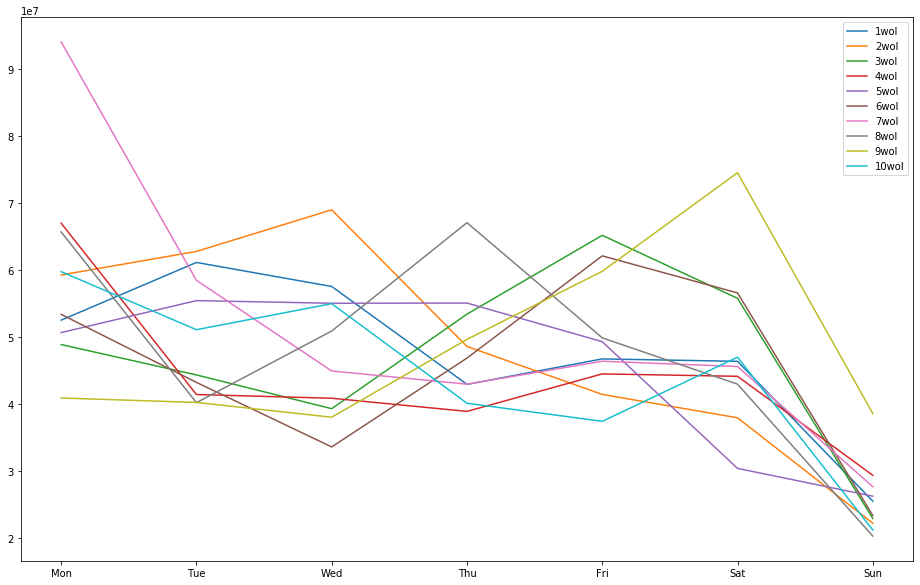

In [17]:
plt.figure(figsize = (16,10))
day_month_sell_eng = day_month_sell.reindex(['월','화','수','목','금','토','일'])
day_month_sell_eng.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
for i in range(1,11):
    plt.plot(day_month_sell_eng.index, day_month_sell_eng[i], label = str(i) + "wol")
plt.legend()
plt.show()

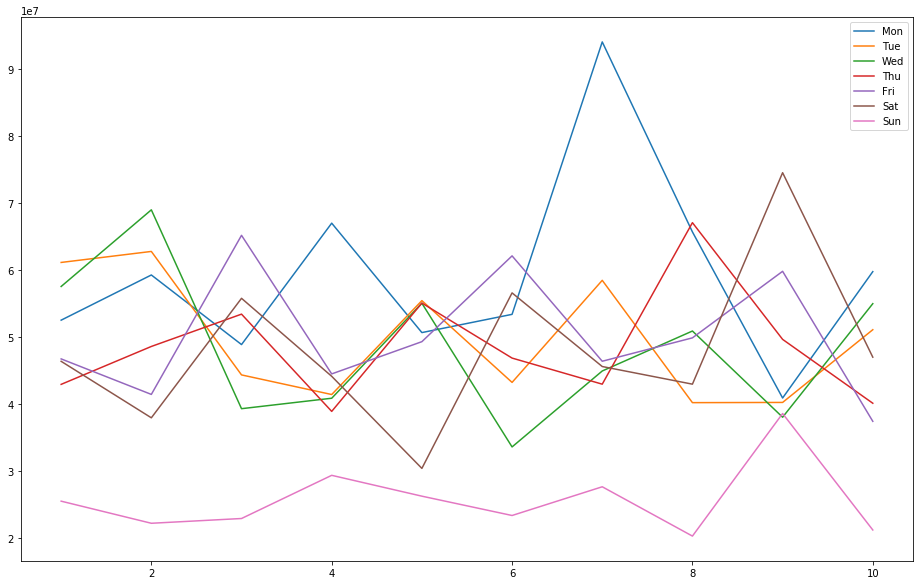

In [10]:
plt.figure(figsize = (16,10))
#day_month_sell.index = np.array(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
day_month_sell_T = day_month_sell.T
for i in day_month_sell_T.columns:
    plt.plot(day_month_sell_T.index, day_month_sell_T[i], label = i)
plt.legend()
plt.show()

In [59]:
monthly_earn.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='월')

In [172]:
monthly_earn = pd.DataFrame(monthly_earn, index = range(1,11))
monthly_earn.rename(columns = {'구매금액' : '월별총매출'}, inplace= True)
monthly_earn

,월별총매출
1,332548896.0
2,341017148.0
3,329615419.0
4,305929674.0
5,321946843.0
6,318915816.0
7,359898229.0
8,336807758.0
9,341560392.0
10,311331795.0


In [173]:
df_cp = customer_price[['농축수산물']]
df_cp

월,농축수산물
1,-1.8
2,2.8
3,1.2
4,3.5
5,1.7
6,0.9
7,1.2
8,4.6
9,8.6
10,8.5


In [100]:
customer_price

월,농축수산물
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
10,NaN


In [175]:
df_monthly_earn = monthly_earn.merge(df_cp, left_on = monthly_earn.index, right_on = df_cp.index, how = 'inner')
df_monthly_earn.drop('key_0', axis = 1, inplace= True)
df_monthly_earn.index = range(1,11)
df_monthly_earn

,월별총매출,농축수산물
1,332548896.0,-1.8
2,341017148.0,2.8
3,329615419.0,1.2
4,305929674.0,3.5
5,321946843.0,1.7
6,318915816.0,0.9
7,359898229.0,1.2
8,336807758.0,4.6
9,341560392.0,8.6
10,311331795.0,8.5


In [121]:
customer_price

,월,1,2,3,4,5,6,7,8,9,10
0,소비자물가,0.8,1.3,1.2,1.5,1.5,1.5,1.1,1.4,2.1,2.0
1,농축수산물,-1.8,2.8,1.2,3.5,1.7,0.9,1.2,4.6,8.6,8.5
2,공업제품,0.8,0.6,0.8,1.3,1.5,1.6,1.8,1.8,1.8,1.8
3,집세,1.1,1.0,0.9,0.8,0.6,0.6,0.5,0.5,0.4,0.4
4,공공서비스,0.5,0.4,0.4,0.3,0.2,0.3,0.1,0.0,0.0,0.1
5,개인서비스,1.7,2.3,2.6,2.6,2.8,2.8,2.4,2.5,2.7,2.5
6,근원물가,0.9,1.1,1.3,1.4,1.3,1.2,0.8,0.9,1.3,1.2
7,생활물가,0.7,1.3,1.1,1.5,1.5,1.5,1.1,1.5,2.5,2.6


In [125]:
customer_price = pd.read_csv('소비자물가지수.csv', encoding = 'cp949')
customer_price.rename(columns = {'Unnamed: 0' : '월'}, inplace = True)
customer_price.set_index('월', inplace = True)
customer_price = customer_price.T
customer_price.index = pd.to_numeric(customer_price.index)
customer_price

월,소비자물가,농축수산물,공업제품,집세,공공서비스,개인서비스,근원물가,생활물가
1,0.8,-1.8,0.8,1.1,0.5,1.7,0.9,0.7
2,1.3,2.8,0.6,1.0,0.4,2.3,1.1,1.3
3,1.2,1.2,0.8,0.9,0.4,2.6,1.3,1.1
4,1.5,3.5,1.3,0.8,0.3,2.6,1.4,1.5
5,1.5,1.7,1.5,0.6,0.2,2.8,1.3,1.5
6,1.5,0.9,1.6,0.6,0.3,2.8,1.2,1.5
7,1.1,1.2,1.8,0.5,0.1,2.4,0.8,1.1
8,1.4,4.6,1.8,0.5,0.0,2.5,0.9,1.5
9,2.1,8.6,1.8,0.4,0.0,2.7,1.3,2.5
10,2.0,8.5,1.8,0.4,0.1,2.5,1.2,2.6


In [176]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
cp_scaled = min_max_scaler.fit_transform(df_monthly_earn)
cp_scaled = pd.DataFrame(cp_scaled, columns=df_monthly_earn.columns, index=list(df_monthly_earn.index.values))
cp_scaled.index = range(1,11)
cp_scaled

,월별총매출,농축수산물
1,0.493236,0.000000
2,0.650147,0.442308
3,0.438880,0.288462
4,0.000000,0.509615
5,0.296787,0.336538
6,0.240624,0.259615
7,1.000000,0.288462
8,0.572150,0.615385
9,0.660213,1.000000
10,0.100098,0.990385


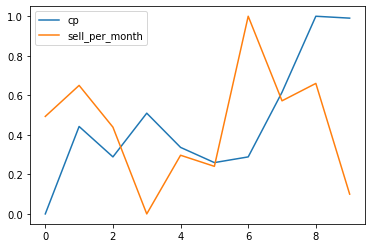

In [138]:
plt.plot(cp_scaled.index, cp_scaled.농축수산물, label = 'cp')
plt.plot(cp_scaled.index, cp_scaled['월별총매출'], label = 'sell_per_month')
plt.legend(loc = 'upper left')
plt.show()
# sns.pointplot(data = customer_price, x = customer_price.index, y = customer_price.농축수산물)
# sns.pointplot(data = df_monthly_earn, x = df_monthly_earn.index, y = df_monthly_earn['총매출'])

## 4월, 10월 잘 안팔렸고, 2월, 7~9월 잘팔림

In [150]:
monthly_visit_sum = total4.groupby(['월'])['구매금액'].count()
monthly_visit_sum

월
1     30164
2     27018
3     30187
4     28351
5     29196
6     29985
7     31443
8     30332
9     27630
10    27718
Name: 구매금액, dtype: int64

## 하지만 방문수를 보면 2월이 제일 낮음, 9~10월도 낮음
### 매출은 좋지만 방문수가 적은 월 : 2월, 9월
### 4, 10월은 매출, 방문수 모두 저조

In [164]:
df_monthly_visit_sum = pd.DataFrame(monthly_visit_sum)
a = min_max_scaler.fit_transform(df_monthly_visit_sum)
monthly_visit_sum_scaled = pd.DataFrame(a, columns=df_monthly_visit_sum.columns, index=list(df_monthly_visit_sum.index.values))
monthly_visit_sum_scaled.rename(columns = {'구매금액' : '월별구매건수'}, inplace = True)
monthly_visit_sum_scaled

,월별구매건수
1,0.710960
2,0.000000
3,0.716158
4,0.301243
5,0.492203
6,0.670508
7,1.000000
8,0.748927
9,0.138305
10,0.158192


In [178]:
df_scaled = cp_scaled.merge(monthly_visit_sum_scaled, left_index = True, right_index = True, how = 'inner')
df_scaled.rename(columns = {'농축수산물' : '농축수산물_물가지수'}, inplace = True)
df_scaled

,월별총매출,농축수산물_물가지수,월별구매건수
1,0.493236,0.000000,0.710960
2,0.650147,0.442308,0.000000
3,0.438880,0.288462,0.716158
4,0.000000,0.509615,0.301243
5,0.296787,0.336538,0.492203
6,0.240624,0.259615,0.670508
7,1.000000,0.288462,1.000000
8,0.572150,0.615385,0.748927
9,0.660213,1.000000,0.138305
10,0.100098,0.990385,0.158192


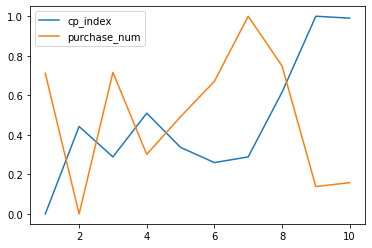

In [179]:
plt.plot(df_scaled.index, df_scaled.농축수산물_물가지수, label = 'cp_index')
#plt.plot(df_scaled.index, df_scaled['월별총매출'], label = 'sell_per_month')
plt.plot(df_scaled.index, df_scaled['월별구매건수'], label = 'purchase_num')
plt.legend(loc = 'upper left')
plt.show()

In [183]:
df_scaled.to_csv('월별_물가지수_매출_구매건수.csv', index = False)

In [184]:
a = pd.read_csv('월별_물가지수_매출_구매건수.csv')
a

,월별총매출,농축수산물_물가지수,월별구매건수
0,0.493236,0.000000,0.710960
1,0.650147,0.442308,0.000000
2,0.438880,0.288462,0.716158
3,0.000000,0.509615,0.301243
4,0.296787,0.336538,0.492203
5,0.240624,0.259615,0.670508
6,1.000000,0.288462,1.000000
7,0.572150,0.615385,0.748927
8,0.660213,1.000000,0.138305
9,0.100098,0.990385,0.158192


In [35]:
total4[total4['회원번호'] == 1670400000]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,월,요일
31,2018-01-02,1670400000,탈퇴,축산물,유제품,요구르트,달지않은 떠먹는요거트(90g*2개),1.0,7370.0,매장A,NaN,11:07,1,화
321,2018-01-03,1670400000,탈퇴,양념/가루,소스/기타양념,소스,돈가스소스(240g),1.0,7792.0,매장A,NaN,17:52,1,수
662,2018-01-05,1670400000,탈퇴,건강,건강일반,추출/농축액,양배추브로콜리액(100ml*30봉),1.0,46329.0,매장A,NaN,18:14,1,금
1455,2018-01-09,1670400000,탈퇴,간식,과자,스낵,단호박품은쌀과자(40g),1.0,3580.0,매장A,NaN,17:14,1,화
1725,2018-01-11,1670400000,탈퇴,수산,냉동수산,기타냉동수산,새우살(350g),1.0,31167.0,매장A,NaN,16:42,1,목
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289616,2018-10-16,1670400000,탈퇴,반찬,두부/유부,두부,두부(1모:420g),2.0,7466.0,매장D,NaN,18:38,10,화
289629,2018-10-17,1670400000,탈퇴,채소,잎/줄기채소,얼갈이,얼갈이(500g),1.0,2680.0,매장D,NaN,16:39,10,수
289758,2018-10-17,1670400000,탈퇴,반찬,두부/유부,두부,두부(1모:420g),2.0,7466.0,매장D,NaN,17:23,10,수
290691,2018-10-23,1670400000,탈퇴,수산,해조,김,구운김밥김(10장),1.0,3446.0,매장D,NaN,16:25,10,화
